O time de ML chegou com algumas demandas de última hora para resolvermos nesse momento da análise exploratória. Essas demandas são:

1) Calcular a média de quartos por apartamento;

2) Conferir quantos bairros únicos existem na nossa base de dados;

3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

##### 1) Calcular a média de quartos por apartamento;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

data = pd.read_csv(url, sep=";")

In [3]:
data.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


<Axes: ylabel='Tipo'>

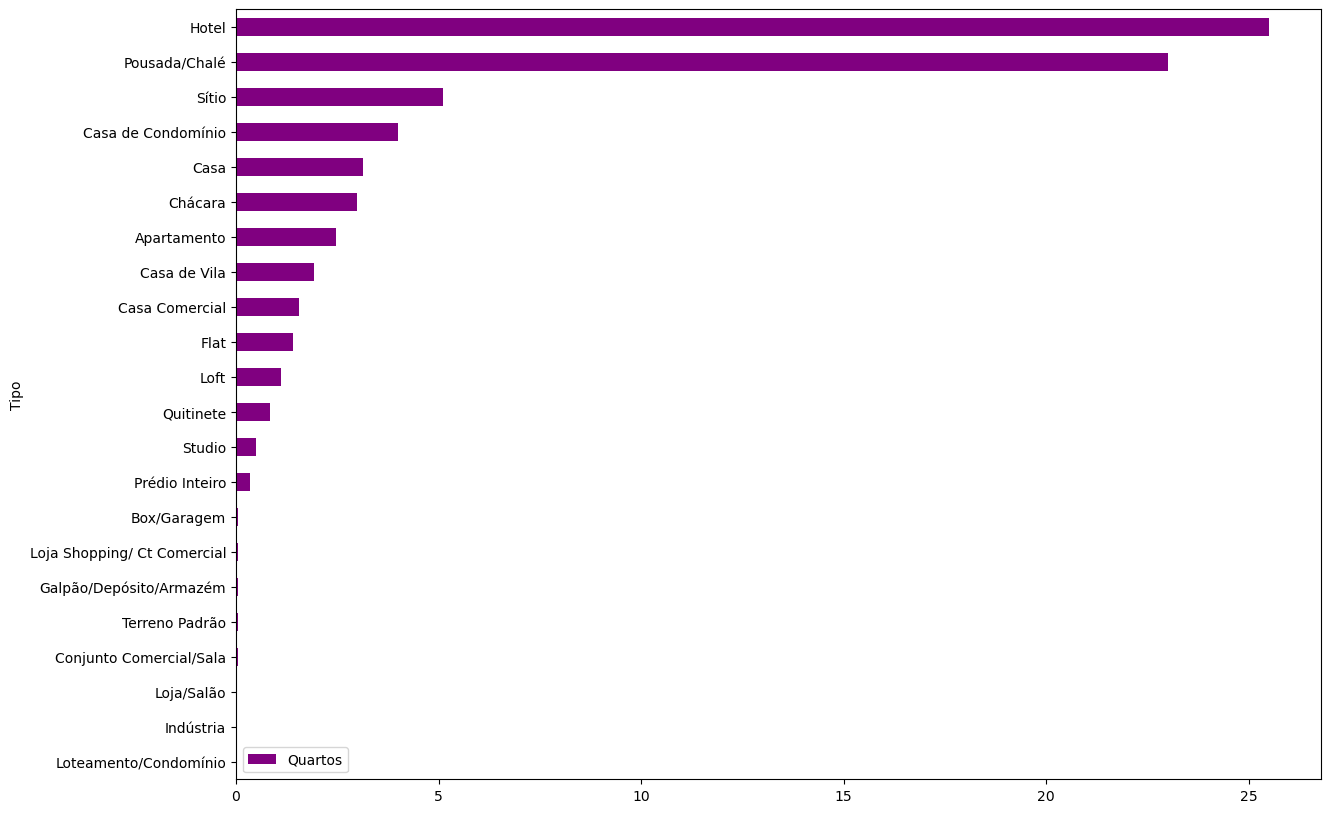

In [4]:
data.groupby('Tipo')[['Quartos']].mean().sort_values(by='Quartos').plot(kind='barh', figsize=(14,10), color='purple')


2) Conferir quantos bairros únicos existem na nossa base de dados;

In [5]:
# Conta a quantidade de bairros

data.Bairro.nunique()

162

In [6]:
data.Bairro.unique

<bound method Series.unique of 0                  Copacabana
1             Jardim Botânico
2             Barra da Tijuca
3                      Centro
4                Higienópolis
                 ...         
32955                  Centro
32956             Jacarepaguá
32957    São Francisco Xavier
32958                  Leblon
32959                  Centro
Name: Bairro, Length: 32960, dtype: object>

##### 3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

In [7]:
data.groupby('Bairro')[['Valor']].mean(numeric_only=True).sort_values(by='Valor', ascending=False)

,Valor
Bairro,
Jacarepaguá,314143.489637
Irajá,154610.470588
Caju,120264.782609
Vasco da Gama,120000.000000
Cidade Nova,88166.692308
...,...
Inhoaíba,738.888889
Turiaçu,733.333333
Magalhães Bastos,726.666667


##### 4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

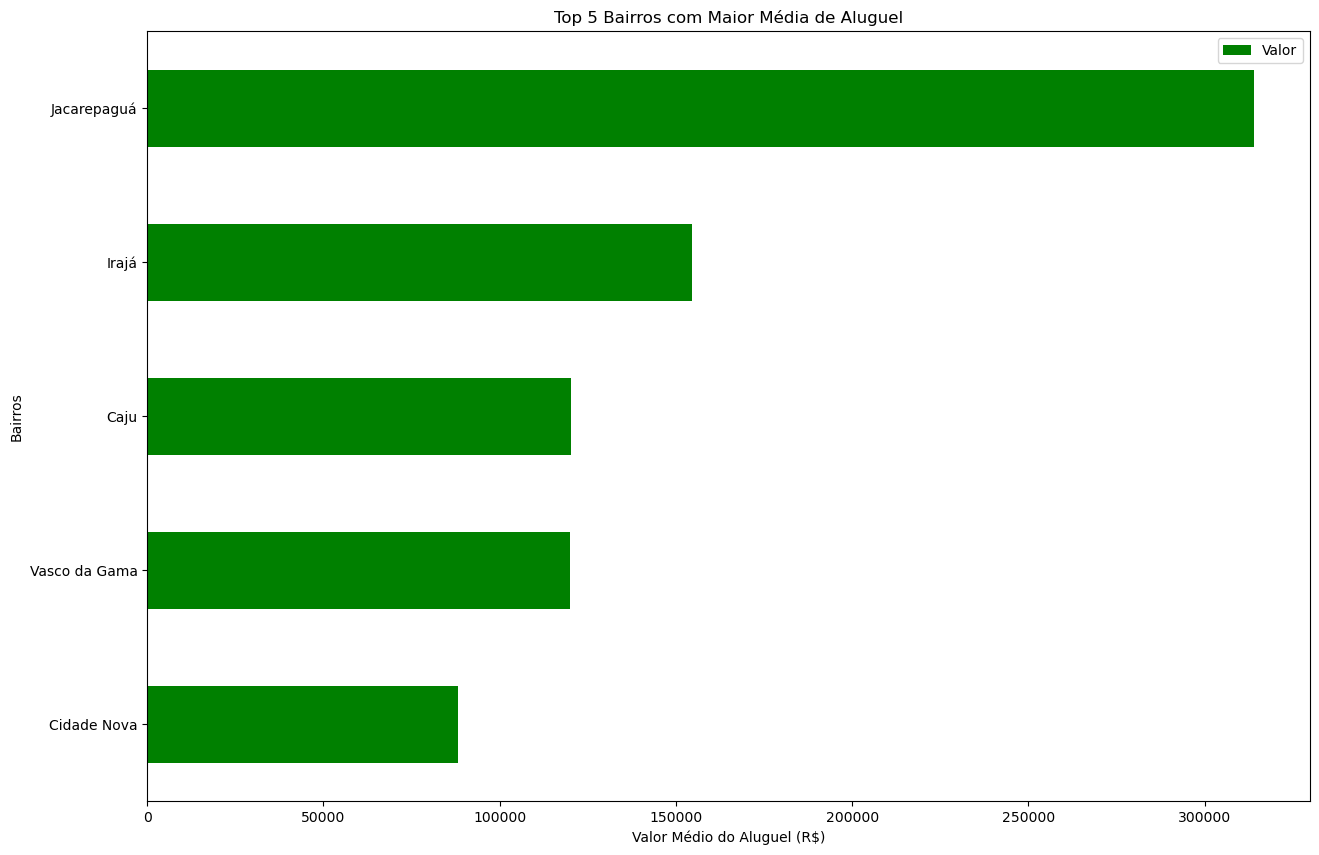

In [8]:
more_elevated_neighborhood = data.groupby('Bairro')[['Valor']].mean(numeric_only=True).sort_values(by='Valor', ascending=False).head(5)


more_elevated_neighborhood.plot(kind='barh', figsize=(15, 10), color='green')
plt.xlabel("Valor Médio do Aluguel (R$)")
plt.ylabel("Bairros")
plt.title("Top 5 Bairros com Maior Média de Aluguel")
plt.gca().invert_yaxis() 
plt.show()